In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
path = "../large-corpus/"
prefix = "sparse_tmp_"

#path = "../../bert-cmp/bert/"
#prefix=""

In [4]:
results_df = pd.read_csv(path+'pretraining_output/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,91,91,1,2,91,62,8,422,93,8,...,0,0,0,0,0,0,0,0,0,0
1,60,60,10,2,20,22,86,20,22,198,...,0,0,0,0,0,0,0,0,0,0
2,8,8,11,2,25,80,7,8,65,24,...,0,0,0,0,0,0,0,0,0,0
3,20,20,8,2,11,22,101,309,8,20,...,0,0,0,0,0,0,0,0,0,0
4,8,8,7,2,25,20,22,511,8,20,...,0,0,0,0,0,0,0,0,0,0
5,296,489,4,2,31,32,33,4,37,20,...,0,0,0,0,0,0,0,0,0,0
6,14,14,17,2,20,22,129,8,27,27,...,0,0,0,0,0,0,0,0,0,0
7,20,20,1,2,4,22,612,613,8,8,...,0,0,0,0,0,0,0,0,0,0
8,22,22,19,2,6,22,606,271,8,37,...,0,0,0,0,0,0,0,0,0,0
9,14,14,29,2,11,8,243,20,22,542,...,0,0,0,0,0,0,0,0,0,0


In [5]:
vocab_df = pd.read_csv(path+'global_vocab.csv', header=None)
vocab_df.shape

(3823, 1)

In [6]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.shape

(1146, 1)

In [7]:
set(vocab_df[0]) - set(vocab_df2[0])

{nan,
 'xfit',
 'categorical',
 'squaredhinge',
 'sim',
 'denominator',
 't0',
 'sig',
 'km2',
 'coordinate',
 'warning',
 'logfile',
 'socket',
 'getatime',
 'cd',
 'yhat',
 'pt',
 'valids',
 'transpose3d',
 'multiclassclassifier',
 'keep',
 'kfunc',
 'uniface',
 'linearsvr',
 'ser',
 'cases',
 'pool1d',
 'estimator2',
 'isomap',
 'xred',
 'categories',
 'jobs',
 'parametrize',
 'plsca',
 'izip',
 'summed',
 '1row',
 'pickler',
 'sofar',
 'concentration',
 'tanhshrink',
 'logisticregression',
 'prewarm',
 'ica',
 'hasobject',
 'eexist',
 'impl',
 'patch',
 'nr',
 '10',
 'direction',
 'encoder',
 'combining',
 'ln',
 'builtinfunctiontype',
 'sv',
 'scalar',
 'resolution',
 'clean',
 'emit',
 'yeo',
 'standardmsg',
 'pickled',
 'extents',
 'marginal',
 'engine',
 'nk',
 'estimator0',
 'qr',
 'inplace',
 'urlopen',
 'myx',
 'iterkeys',
 'replicate',
 'tell',
 'refit',
 'protocol',
 'inert',
 'percent10',
 'xbz',
 'mkdtemp',
 'intc',
 'sha256hash',
 'iteration',
 'fu',
 'labels2',
 'dst',

In [12]:
len(vocab_df)

3823

In [13]:
accuracy = 0

In [14]:
per_token_acc = {}; per_token_count = {}

In [15]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [16]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [17]:
import matplotlib.pyplot as plt

In [18]:
from collections import Counter
import numpy as np

In [19]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('warning', 1.0),
 ('log2', 1.0),
 ('store', 1.0),
 ('parametrize', 1.0),
 ('not', 1.0),
 ('condition', 1.0),
 ('anisotropic', 1.0),
 ('patch', 1.0),
 ('cand', 1.0),
 ('randomstate', 1.0),
 ('union1d', 1.0),
 ('bounds', 1.0),
 ('pickled', 1.0),
 ('marginal', 1.0),
 ('unsupportedoperation', 1.0),
 ('qr', 1.0),
 ('urlopen', 1.0),
 ('refit', 1.0),
 ('stopping', 1.0),
 ('try', 1.0),
 ('spacing', 1.0),
 ('convert', 1.0),
 ('analyzer', 1.0),
 ('quantiles', 1.0),
 ('spca', 1.0),
 ('validate', 1.0),
 ('point', 1.0),
 ('assume', 1.0),
 ('checked', 1.0),
 ('descr', 1.0),
 ('exists', 1.0),
 ('covariances', 1.0),
 ('tn', 1.0),
 ('fork', 1.0),
 ('incr', 1.0),
 ('np', 1.0),
 ('20newsgroups', 1.0),
 ('chol', 1.0),
 ('bynipals', 1.0),
 ('folder', 1.0),
 ('eclf', 1.0),
 ('divide', 1.0),
 ('endswith', 1.0),
 ('subcluster', 1.0),
 ('uncovered', 1.0),
 ('colors', 1.0),
 ('im', 1.0),
 ('decrement', 1.0),
 ('strdata', 1.0),
 ('pooling', 1.0),
 ('alias', 1.0),
 ('returncode', 1.0),
 ('invalidoperation', 1.0

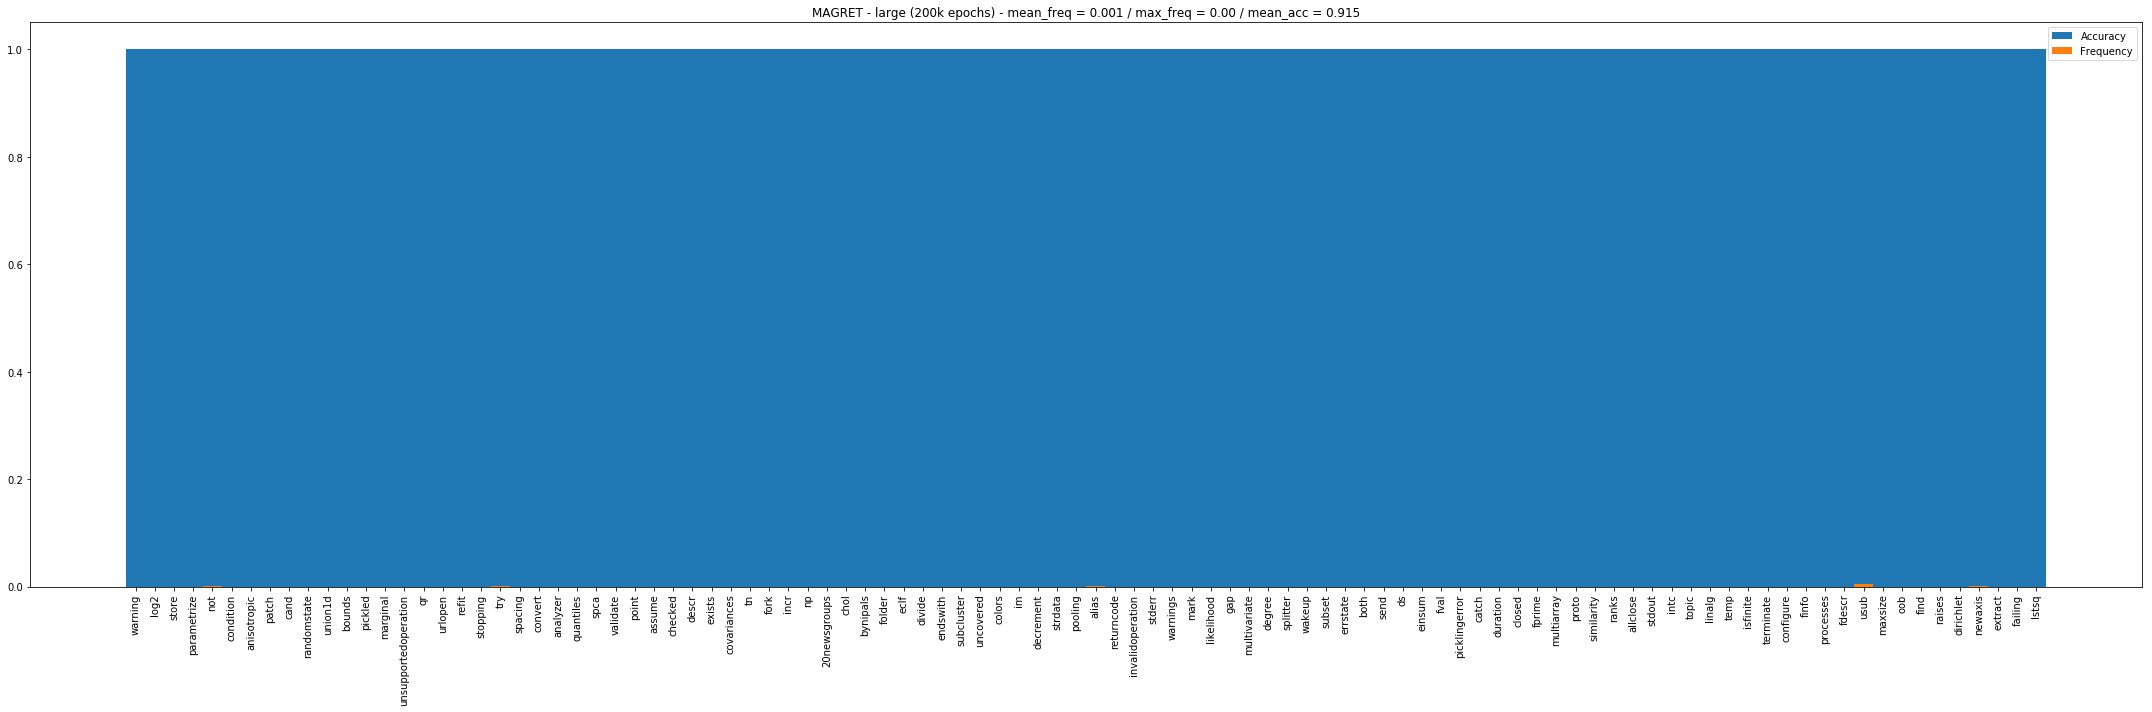

In [20]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(100))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET - large (200k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-lg-200k_epochs_top100.pdf')
plt.show()

In [21]:
pred = list(results_df.loc[10][3:])
pred

[2,
 31,
 32,
 33,
 296,
 33,
 63,
 33,
 192,
 258,
 33,
 76,
 33,
 259,
 260,
 10,
 10,
 24,
 10,
 37,
 20,
 22,
 335,
 20,
 8,
 8,
 4,
 11,
 22,
 8,
 8,
 22,
 8,
 20,
 8,
 8,
 11,
 22,
 63,
 8,
 8,
 11,
 22,
 192,
 258,
 8,
 8,
 11,
 22,
 76,
 8,
 8,
 11,
 22,
 259,
 260,
 8,
 8,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [23]:
pred_str

['[CLS]',
 'functiondef',
 'arguments',
 'arg',
 'self',
 'arg',
 'size',
 'arg',
 'scale',
 'factor',
 'arg',
 'mode',
 'arg',
 'align',
 'corners',
 'nameconstant',
 'nameconstant',
 'str',
 'nameconstant',
 'expr',
 'call',
 'attribute',
 'init',
 'call',
 'name',
 'name',
 '[MASK]',
 'assign',
 'attribute',
 'name',
 'name',
 'attribute',
 'name',
 'call',
 'name',
 'name',
 'assign',
 'attribute',
 'size',
 'name',
 'name',
 'assign',
 'attribute',
 'scale',
 'factor',
 'name',
 'name',
 'assign',
 'attribute',
 'mode',
 'name',
 'name',
 'assign',
 'attribute',
 'align',
 'corners',
 'name',
 'name',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [24]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.2610899182561308),
 ('call', 0.0865985467756585),
 ('num', 0.08628519527702089),
 ('attribute', 0.08107629427792916),
 ('keyword', 0.039586739327883744),
 ('str', 0.030172570390554043),
 ('binop', 0.02768392370572207),
 ('subscript', 0.02438692098092643),
 ('index', 0.02114441416893733),
 ('assign', 0.020358764759309717),
 ('list', 0.019872842870118073),
 ('tuple', 0.013637602179836512),
 ('compare', 0.012306993642143505),
 ('expr', 0.011180744777475023),
 ('nameconstant', 0.010495004541326068),
 ('arg', 0.009645776566757493),
 ('unaryop', 0.009000908265213442),
 ('if', 0.008542234332425068),
 ('slice', 0.00765213442325159),
 ('add', 0.006975476839237057),
 ('shape', 0.005199818346957311),
 ('return', 0.005045413260672116),
 ('mult', 0.0049182561307901905),
 ('usub', 0.004654859218891917),
 ('arguments', 0.004100817438692098),
 ('x', 0.004037238873751135),
 ('fit', 0.003991825613079019),
 ('sub', 0.00388283378746594),
 ('eq', 0.0037193460490463214),
 ('extslice', 0.00347411

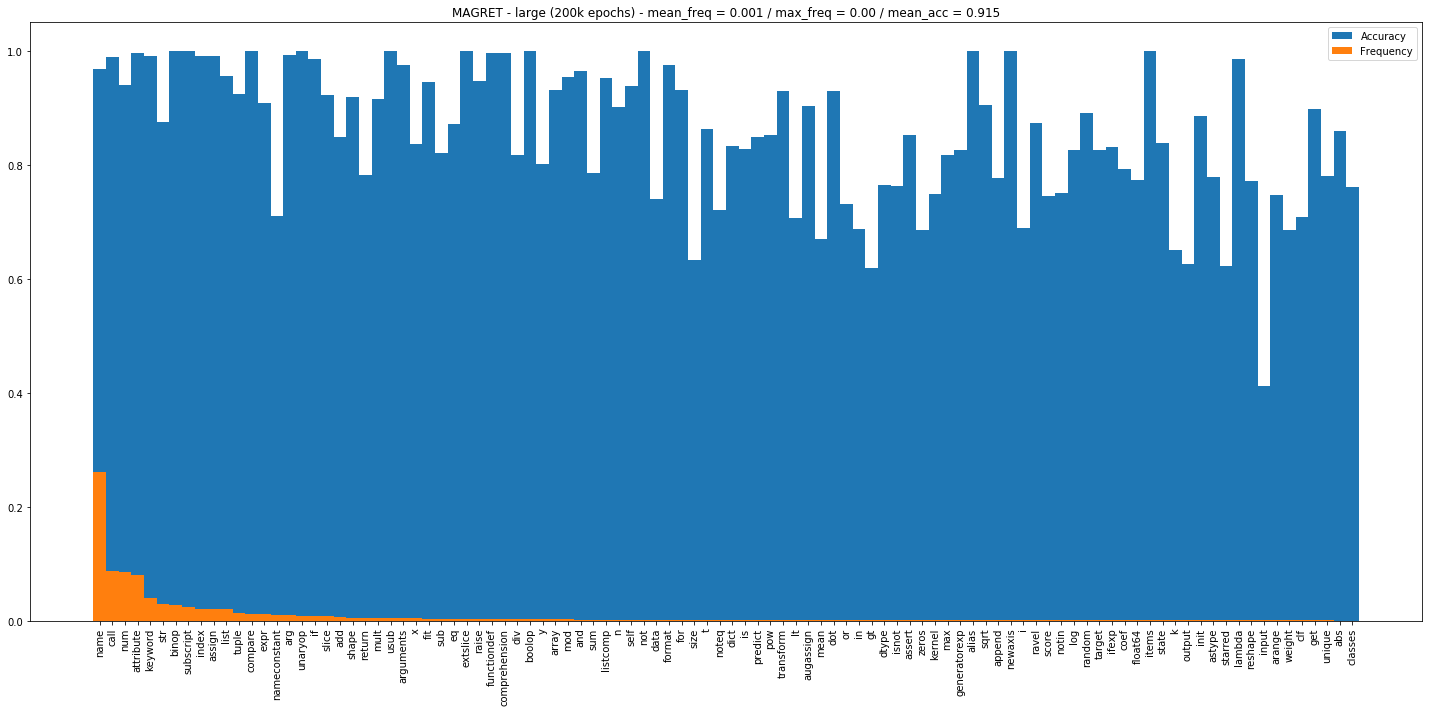

In [25]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET - large (200k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-lg-freq-200k_epochs_top100.png')
plt.show()

In [26]:
confusion = {}

In [27]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if confusion.get(label, None) == None:
        confusion[label] = []
    if prediction != label:
        confusion[label].append(prediction)

In [28]:
confusion_counter = {c: Counter(confusion[c]) for c in confusion}

In [29]:
confusion_counter

{nan: Counter({'alpha': 4, 'float64': 1, nan: 89}),
 'resize': Counter({'kneighbors': 1, 'reshape': 3}),
 'categorical': Counter({'metric': 7, 'n': 4}),
 'bernoulli': Counter({'normal': 5}),
 'steps': Counter({'backend': 1,
          'interval': 1,
          'isnot': 1,
          'matrix': 4,
          'split': 4,
          'weight': 2}),
 'bound': Counter({'d': 6}),
 'yr': Counter({'x': 3}),
 'dilation': Counter({'bias': 2, 'learning': 9}),
 'variance': Counter({'f': 1, 'mask': 1}),
 'sig': Counter({'filename': 1}),
 'expr': Counter({'assert': 7,
          'attribute': 1,
          'name': 152,
          'nameconstant': 3,
          'num': 1,
          'raise': 20,
          'return': 40}),
 'frompyfunc': Counter({'approx': 4, 'repeat': 1, 'reshape': 4}),
 'g': Counter({'clf': 4, 'lda': 4, 's': 3}),
 'binomial': Counter({'normal': 8, 'randint': 3}),
 'coordinate': Counter({'multi': 2}),
 'warning': Counter(),
 'preference': Counter({'tol': 1, 'verbose': 2}),
 'arguments': Counter({'ar

In [30]:
for key, c in confusion_counter.items():
    print("Label -- ", key)
    print('Preds -- ',' '.join(["{} ({})".format(c0, c1) for c0,c1 in c.most_common(5)]))
    print()

Label --  nan
Preds --  nan (89) alpha (4) float64 (1)

Label --  resize
Preds --  reshape (3) kneighbors (1)

Label --  categorical
Preds --  metric (7) n (4)

Label --  bernoulli
Preds --  normal (5)

Label --  steps
Preds --  matrix (4) split (4) weight (2) isnot (1) backend (1)

Label --  bound
Preds --  d (6)

Label --  yr
Preds --  x (3)

Label --  dilation
Preds --  learning (9) bias (2)

Label --  variance
Preds --  f (1) mask (1)

Label --  sig
Preds --  filename (1)

Label --  expr
Preds --  name (152) return (40) raise (20) assert (7) nameconstant (3)

Label --  frompyfunc
Preds --  reshape (4) approx (4) repeat (1)

Label --  g
Preds --  clf (4) lda (4) s (3)

Label --  binomial
Preds --  normal (8) randint (3)

Label --  coordinate
Preds --  multi (2)

Label --  warning
Preds --  

Label --  preference
Preds --  verbose (2) tol (1)

Label --  arguments
Preds --  name (10) transformers (6) arg (3) shape (2) index (1)

Label --  discovery
Preds --  importfrom (4) learning (3

Preds --  returncode (4) weights (2) x2 (1) dist (1)

Label --  mark
Preds --  

Label --  transformer
Preds --  fit (1)

Label --  create
Preds --  csr (2)

Label --  kl
Preds --  loss (5) bias (3)

Label --  likelihood
Preds --  

Label --  floor
Preds --  size (1)

Label --  current
Preds --  y (5) max (2) metric (1)

Label --  dtype
Preds --  float64 (14) class (9) shape (6) name (6) float32 (3)

Label --  searchsorted
Preds --  labels (2)

Label --  on
Preds --  stop (7) return (2)

Label --  gap
Preds --  

Label --  multivariate
Preds --  

Label --  writer
Preds --  reader (5) handle (4) stdout (1)

Label --  filepath
Preds --  dir (2)

Label --  reconstruct
Preds --  

Label --  fan
Preds --  axis (1)

Label --  diabetes
Preds --  mean (3) scale (1)

Label --  strides
Preds --  shape (6) kernel (4) filters (2) self (2) kwargs (1)

Label --  exit
Preds --  management (1)

Label --  isnot
Preds --  is (48) notin (1)

Label --  computation
Preds --  code (1)

Label --  remainder


Preds --  sparse (2)

Label --  work
Preds --  assign (1)

Label --  processes
Preds --  

Label --  gte
Preds --  gt (20) lt (10) lte (7) noteq (6) notin (4)

Label --  nusvr
Preds --  svc (5)

Label --  fdescr
Preds --  

Label --  uint8
Preds --  int (7) data (1) max (1)

Label --  circles
Preds --  classification (1)

Label --  top
Preds --  with (7) want (6) data (1) module (1) range (1)

Label --  part
Preds --  gradient (4)

Label --  ins
Preds --  layer (1) result (1)

Label --  usub
Preds --  

Label --  rint
Preds --  randint (1)

Label --  eclf2
Preds --  eclf (5)

Label --  rate
Preds --  epsilon (5) kwargs (3) padding (1) div (1) nu (1)

Label --  and
Preds --  or (16)

Label --  kind
Preds --  idx (2) format (2)

Label --  est
Preds --  clf (15) estimator (5) ransac (2) rbm1 (1) cv (1)

Label --  maxsize
Preds --  

Label --  friedman1
Preds --  classification (1)

Label --  oob
Preds --  

Label --  hot
Preds --  batch (7) backend (2)

Label --  location
Preds --  cached

Preds --  i (5) c (4)

Label --  epsilon
Preds --  group (8) alpha (3) tol (3) x (1) exp (1)

Label --  csv
Preds --  make (2)

Label --  common
Preds --  

Label --  log10
Preds --  

Label --  boolop
Preds --  

Label --  inbound
Preds --  output (3) cell (2) n (2) h (1) ignore (1)

Label --  dispatch
Preds --  append (5) backend (3) environ (2) activation (1) dict (1)

Label --  percentile
Preds --  pad (2)

Label --  centered
Preds --  

Label --  updates
Preds --  name (3) mask (3) cls (1) losses (1)

Label --  any
Preds --  all (5) array (3)

Label --  lassolars
Preds --  lasso (5)

Label --  isdigit
Preds --  startswith (6)

Label --  std
Preds --  mean (8) sum (5) centers (2) var (1)

Label --  conv3d
Preds --  t (2) learning (1) fit (1)

Label --  receptive
Preds --  batch (4)

Label --  pattern
Preds --  names (4) name (4) kernel (1) affinity (1) y (1)

Label --  invalid
Preds --  

Label --  islice
Preds --  backend (4)

Label --  xt
Preds --  x (6) labels (2) cov (1) value 

Preds --  

Label --  varargs
Preds --  args (3)

Label --  alive
Preds --  stationary (1)

Label --  train
Preds --  test (13) batch (5) step (3) error (2) gradient (2)

Label --  improvement
Preds --  

Label --  sparseefficiencywarning
Preds --  name (2)

Label --  skip
Preds --  make (3) mask (1) arguments (1) support (1) start (1)

Label --  y2
Preds --  x (10) y1 (9) target (1) y (1)

Label --  abspath
Preds --  basename (1)

Label --  labelpropagation
Preds --  labelspreading (1)

Label --  freedimension
Preds --  dtype (10) category (1) shape (1) name (1)

Label --  startswith
Preds --  endswith (2)

Label --  values
Preds --  message (5) readlines (4) s (4) data (3) dtype (3)

Label --  popen
Preds --  new (2)

Label --  counter
Preds --  args (1) size (1)

Label --  warnings
Preds --  

Label --  vstack
Preds --  hstack (11)

Label --  binarizer
Preds --  

Label --  shutdown
Preds --  broken (2)

Label --  logaddexp
Preds --  exp (5) maximum (3)

Label --  methods
Preds --  

In [31]:
token_names = ["Module","Interactive","Expression","Suite","FunctionDef","AsyncFunctionDef","ClassDef","Return","Delete","Assign","AugAssign","For","AsyncFor","While","If","With","AsyncWith","Raise","Try","Assert","Import","ImportFrom","Global","Nonlocal","Expr","Pass","Break","Continue","BoolOp","BinOp","UnaryOp","Lambda","IfExp","Dict","Set","ListComp","SetComp","DictComp","GeneratorExp","Await","Yield","YieldFrom","Compare","Call","Num","Str","FormattedValue","JoinedStr","Bytes","NameConstant","Ellipsis","Constant","Attribute","Subscript","Starred","Name","List","Tuple","Load","Store","Del","AugLoad","AugStore","Param","Slice","ExtSlice","Index","And","Or","Add","Sub","Mult","MatMult","Div","Mod","Pow","LShift","RShift","BitOr","BitXor","BitAnd","FloorDiv","Invert","Not","UAdd","USub","Eq","NotEq","Lt","LtE","Gt","GtE","Is","IsNot","In","NotIn","excepthandler","ExceptHandler","arguments","arg","keyword","alias","withitem","comprehension"]
token_names = [t.lower() for t in token_names]

In [32]:
def is_ast_token(t):
    return t in token_names

In [33]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_ast_token(prediction) == is_ast_token(label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [34]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9962488646684832, 0.003751135331516803)

In [35]:
MOD_SYMBOLS = ["Module", "Interactive", "Expression", "Suite"]
STMT_SYMBOLS = ["FunctionDef", "AsyncFunctionDef", "ClassDef", "Return", "Delete", \
                "Assign", "AugAssign", "For", "AsyncFor", "While", "If", "With", "AsyncWith", \
                "Raise", "Try", "Assert", "Import", "ImportFrom", "Global", "Nonlocal", \
                "Expr", "Pass", "Break", "Continue"]
EXPR_SYMBOLS = ["BoolOp", "BinOp", "UnaryOp", "Lambda", "IfExp", "Dict", "Set", "ListComp", \
                "SetComp", "DictComp", "GeneratorExp", "Await", "Yield", "YieldFrom", \
                "Compare", "Call", "Num", "Str", "FormattedValue", "JoinedStr", "Bytes", \
                "NameConstant", "Ellipsis", "Constant", "Attribute", "Subscript", \
                "Starred", "Name", "List", "Tuple"]
EXPR_CONTENT_SYMBOLS = ["Load", "Store", "Del", "AugLoad", "AugStore", "Param"]
SLICE_SYMBOLS = ["Slice", "ExtSlice", "Index"]
BOOLOP_SYMBOLS = ["And", "Or"]
OPERATOR_SYMBOLS = ["Add", "Sub", "Mult", "MatMult", "Div", "Mod", "Pow", "LShift", "RShift", \
                    "BitOr", "BitXor", "BitAnd", "FloorDiv"]
UNARYOP_SYMBOLS = ["Invert", "Not", "UAdd", "USub"]
CMPOP_SYMBOLS = ["Eq", "NotEq", "Lt", "LtE", "Gt", "GtE", "Is", "IsNot", "In", "NotIn"]
COMPREHENSION_SYMBOLS = ["comprehension"]
EXCEPT_SYMBOLS = ["excepthandler", "ExceptHandler"]
ARG_SYMBOLS = ["arguments", "arg", "keyword"]
IMPORT_SYMBOLS = ["alias", "withitem"]

In [36]:
def to_lower(l):
    return [l_.lower() for l_ in l]

In [37]:
MOD_SYMBOLS = to_lower(MOD_SYMBOLS)
STMT_SYMBOLS = to_lower(STMT_SYMBOLS)
EXPR_SYMBOLS = to_lower(EXPR_SYMBOLS)
EXPR_CONTENT_SYMBOLS = to_lower(EXPR_CONTENT_SYMBOLS)
SLICE_SYMBOLS = to_lower(SLICE_SYMBOLS)
BOOLOP_SYMBOLS = to_lower(BOOLOP_SYMBOLS)
OPERATOR_SYMBOLS = to_lower(OPERATOR_SYMBOLS)
UNARYOP_SYMBOLS = to_lower(UNARYOP_SYMBOLS)
CMPOP_SYMBOLS = to_lower(CMPOP_SYMBOLS)
COMPREHENSION_SYMBOLS = to_lower(COMPREHENSION_SYMBOLS)
EXCEPT_SYMBOLS = to_lower(EXCEPT_SYMBOLS)
ARG_SYMBOLS = to_lower(ARG_SYMBOLS)
IMPORT_SYMBOLS = to_lower(IMPORT_SYMBOLS)

In [38]:
def get_token_class_id(t):
    if t in MOD_SYMBOLS: return 0
    if t in STMT_SYMBOLS: return 1
    if t in EXPR_SYMBOLS: return 2
    if t in EXPR_CONTENT_SYMBOLS: return 3
    if t in SLICE_SYMBOLS: return 4
    if t in BOOLOP_SYMBOLS: return 5
    if t in OPERATOR_SYMBOLS: return 6
    if t in UNARYOP_SYMBOLS: return 7
    if t in CMPOP_SYMBOLS: return 8
    if t in ARG_SYMBOLS: return 9
    if t in EXCEPT_SYMBOLS: return 10
    if t in COMPREHENSION_SYMBOLS: return 11
    if t in IMPORT_SYMBOLS: return 12
    else: return 13

In [39]:
def is_same_class(t0, t1):
    return get_token_class_id(t0) == get_token_class_id(t1)

In [40]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_same_class(prediction, label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [41]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9908219800181653, 0.009178019981834696)

In [42]:
classes = ["MOD", "STMT", "EXPR", "EXPR_CONT", "SLICE", "BOOLOP", "OPERATOR", "UNARY", "CMPOP", "COMPR", "EXCEPT", "ARG", "IMPORT", "VAR"]

In [43]:
confusion_mat = np.zeros((14,14))
class_freqs = {str(i):0 for i in range(14)};
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    confusion_mat[t0][t1] += 1
    class_freqs[str(t1)] += 1

In [44]:
confusion_mat

array([[5.00000e+00, 0.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.90000e+01],
       [0.00000e+00, 1.20850e+04, 3.68000e+02, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 9.00000e+00, 0.00000e+00, 1.00000e+00, 2.50000e+01,
        1.70000e+01, 2.00000e+00, 0.00000e+00, 5.60000e+01],
       [8.00000e+00, 4.21000e+02, 1.47267e+05, 0.00000e+00, 1.50000e+01,
        1.00000e+00, 7.00000e+00, 0.00000e+00, 1.20000e+01, 6.80000e+01,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.49000e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 2.20000e+01, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50000e+01],
       [0.00000e+00, 2.00000e+00, 2.60000e+01, 0.00000e+00, 7.06000e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.000

In [45]:
freqs = {k: v/len(results_df) for k,v in class_freqs.items()}
freqs

{'0': 0.00013623978201634878,
 '1': 0.05705722070844687,
 '10': 0.0004995458673932788,
 '11': 0.002892824704813806,
 '12': 0.0012443233424159854,
 '13': 0.13653950953678473,
 '2': 0.671866485013624,
 '3': 0.00022706630336058128,
 '4': 0.03227066303360581,
 '5': 0.003106267029972752,
 '6': 0.02237511353315168,
 '7': 0.006693914623069936,
 '8': 0.0117574931880109,
 '9': 0.05333333333333334}

In [46]:
np.sum(confusion_mat, axis=0)

array([3.00000e+01, 1.25640e+04, 1.47945e+05, 5.00000e+01, 7.10600e+03,
       6.84000e+02, 4.92700e+03, 1.47400e+03, 2.58900e+03, 1.17440e+04,
       1.10000e+02, 6.37000e+02, 2.74000e+02, 3.00660e+04])

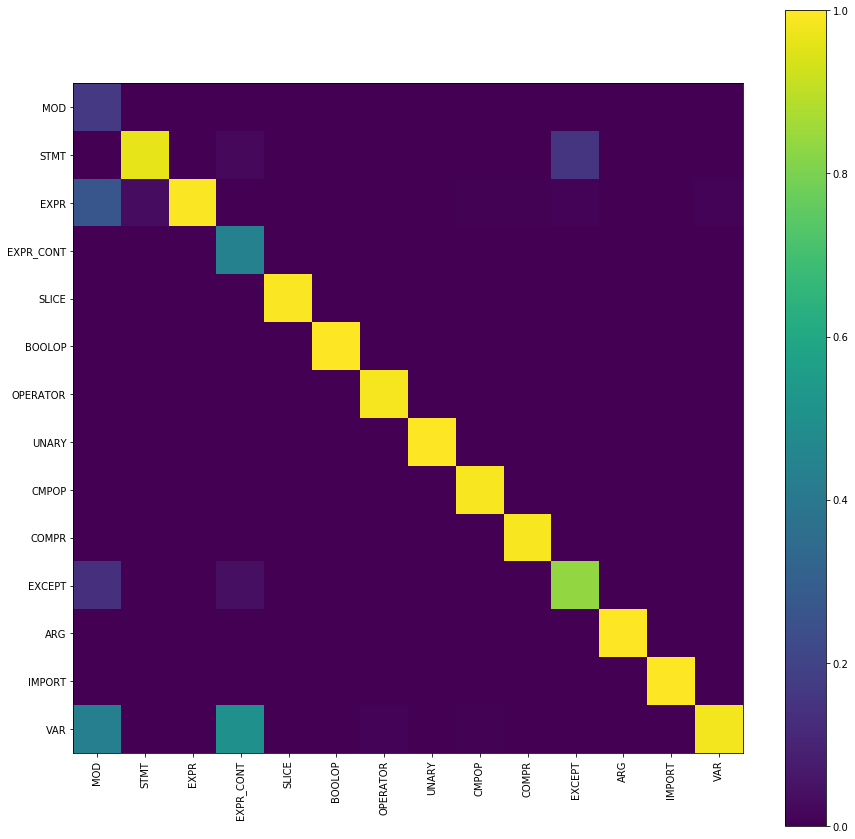

In [47]:
plt.figure(figsize=(15,15))
n = np.sum(confusion_mat, axis=0)
plt.imshow(confusion_mat / n)
plt.xticks(range(14), classes, rotation=90)
plt.yticks(range(14), classes)
plt.colorbar()

MOD 0.167 30 0.0
STMT 0.962 12564 0.057
EXPR 0.995 147945 0.672
EXPR_CONT 0.44 50 0.0
SLICE 0.994 7106 0.032
BOOLOP 0.999 684 0.003
OPERATOR 0.988 4927 0.022
UNARY 1.0 1474 0.007
CMPOP 0.99 2589 0.012
COMPR 0.991 11744 0.053
EXCEPT 0.836 110 0.0
ARG 0.997 637 0.003
IMPORT 1.0 274 0.001
VAR 0.982 30066 0.137


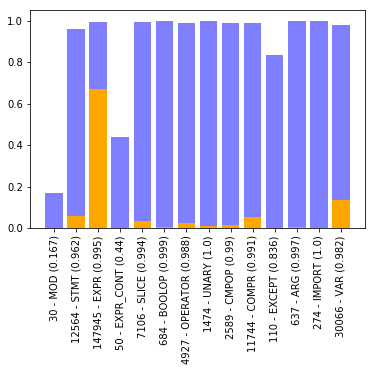

In [48]:
n = np.sum(confusion_mat, axis=0)
normed = confusion_mat / n
for i in range(14):
    plt.bar(classes[i], np.around(normed[i][i],3), color='b', alpha=0.5)
    plt.bar(classes[i], np.around(freqs[str(i)],3), color='orange')
    print(classes[i], np.around(normed[i][i],3), class_freqs[str(i)], np.around(freqs[str(i)],3))
plt.xticks(range(14), [str(class_freqs[str(i)])+" - "+c + " (" + str(np.around(normed[i][i],3)) + ")" for i,c in enumerate(classes)], rotation=90);

In [49]:
[freqs[str(i)]*normed[i][i] for i in range(14)]

[2.270663033605813e-05,
 0.0548819255222525,
 0.6687874659400546,
 9.990917347865577e-05,
 0.03206176203451407,
 0.0031017257039055402,
 0.022107175295186195,
 0.006693914623069936,
 0.011634877384196185,
 0.052829246139872846,
 0.00041780199818346956,
 0.0028837420526793825,
 0.0012443233424159854,
 0.13405540417801998]

In [50]:
from sklearn.metrics import f1_score

In [51]:
preds = []; labels = []
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    preds.append(prediction)
    labels.append(label)

In [52]:
f1_score(labels, preds, average='micro')

0.9153224341507721

In [53]:
f1_score(labels, preds, average='macro')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.34354859943746796

In [54]:
f1_score(labels, preds, average='weighted')

0.9102201996974334